In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [ ]:
# Define the folder path
data_folder = 'output/compute_run'

# Define a dictionary to store data
data = {}

# Load each file based on its extension
for filename in os.listdir(data_folder):
    file_path = os.path.join(data_folder, filename)

    # Remove the file extension from the filename for the dictionary key
    file_key = os.path.splitext(filename)[0]

    # Check the file extension and load accordingly
    if filename.endswith('.npy'):
        # Load numpy arrays
        try:
            data[file_key] = np.load(file_path, allow_pickle=True)
            print(f"Loaded {filename} as numpy array.")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    elif filename.endswith('.pkl'):
        # Load pickle files
        try:
            with open(file_path, 'rb') as f:
                data[file_key] = pickle.load(f)
            print(f"Loaded {filename} as pickle file.")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    elif filename.endswith('.bin'):
        # Load binary files; specifics might depend on file structure
        try:
            with open(file_path, 'rb') as f:
                data[file_key] = f.read()  # Reading raw binary data
            print(f"Loaded {filename} as binary file.")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    elif filename.endswith('.txt'):
        # Load text files
        try:
            with open(file_path, 'r') as f:
                data[file_key] = f.read()  # Reading text data
            print(f"Loaded {filename} as text file.")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    else:
        print(f"Unknown file type for {filename}. Skipping.")

Loaded energies.npy as numpy array.
Loaded dmft_sigma_last.npy as numpy array.
Loaded hamiltonian.npy as numpy array.
Loaded hs_list_ii.pkl as pickle file.
Loaded dmft_delta_2.npy as numpy array.
Loaded dmft_sigma.npy as numpy array.
Loaded sigma_last_iterations.npy as numpy array.
Loaded occupancies.npy as numpy array.
Loaded eigvals_Heff.npy as numpy array.
Loaded dmft_transmission.npy as numpy array.
Loaded delta_last_iterations.npy as numpy array.
Loaded mu.txt as text file.
Loaded dmft_delta.npy as numpy array.
Loaded effective_hamiltonian.npy as numpy array.
Loaded matsubara_hybridization.bin as binary file.
Loaded index_active_region.npy as numpy array.
Loaded dmft_sigma_2.npy as numpy array.
Loaded dmft_delta_last.npy as numpy array.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Loaded self_energy.npy as numpy array.
Loaded hs_los_lowdin.npy as numpy array.
Loaded mu_last.txt as text file.
Loaded matsubara_energies.npy as numpy array.
Loaded mu_last_iterations.npy as numpy array.
Loaded mu_2.txt as text file.
Unknown file type for .ipynb_checkpoints. Skipping.
Loaded hybridization.bin as binary file.
Loaded hs_list_ij.pkl as pickle file.
Loaded dft_transmission.npy as numpy array.


In [3]:
print("\nShapes of loaded data:")
for key, value in data.items():
    # Check if the value has a shape attribute (e.g., numpy arrays)
    if hasattr(value, 'shape'):
        print(f"{key}: {value.shape}")
    elif isinstance(value, (list, dict)):
        # Print length for lists and dictionaries
        print(f"{key}: Length {len(value)}")
    else:
        print(f"{key}: Data type {type(value)} (no shape/length)")


Shapes of loaded data:
energies: (601,)
dmft_sigma_last: (601, 9, 9)
hamiltonian: (9, 9)
hs_list_ii: Length 5
dmft_delta_2: (9, 3000)
dmft_sigma: (601, 9, 9)
sigma_last_iterations: (0,)
occupancies: (9,)
eigvals_Heff: (9,)
dmft_transmission: (2, 601)
delta_last_iterations: (0,)
mu: Data type <class 'str'> (no shape/length)
dmft_delta: (9, 3000)
effective_hamiltonian: (9, 9)
matsubara_hybridization: Data type <class 'bytes'> (no shape/length)
index_active_region: (9,)
dmft_sigma_2: (601, 9, 9)
dmft_delta_last: (9, 3000)
self_energy: (3,)
hs_los_lowdin: (2, 1, 2394, 2394)
mu_last: Data type <class 'str'> (no shape/length)
matsubara_energies: (3000,)
mu_last_iterations: (0,)
mu_2: Data type <class 'str'> (no shape/length)
hybridization: Data type <class 'bytes'> (no shape/length)
hs_list_ij: Length 4
dft_transmission: (2, 601)


In [4]:
print(data['occupancies'])

[1.8584734  1.17283532 0.99984953 0.94705889 1.4467579  1.25806845
 0.99285049 1.17355686 1.85227601]


In [10]:
data['dmft_sigma'][0,:,:]

array([[-1.21342821-3.16407193e-06j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.52713342-2.15675949e-04j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.59909367-4.54913806e-05j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.000000

In [5]:
# Define the path to the reference data for transmission
ref_path = "published_reference/transmission"

# Load the reference LCAO transmission data from a file
Eref, Tref_dft = np.load(f"{ref_path}/ET_dft.npy")

# Load the reference LCAO transmission data from a file
E2ref, Tref_dmft = np.load(f"{ref_path}/ET_dmft.npy")

# Load the computed DFT transmission data from the `data` dictionary
E, dft_transmission = data['dft_transmission'][0, :], data['dft_transmission'][1, :]

E2, dmft_transmission = data['dmft_transmission'][0, :], data['dmft_transmission'][1, :]

/users/ajayaraj/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


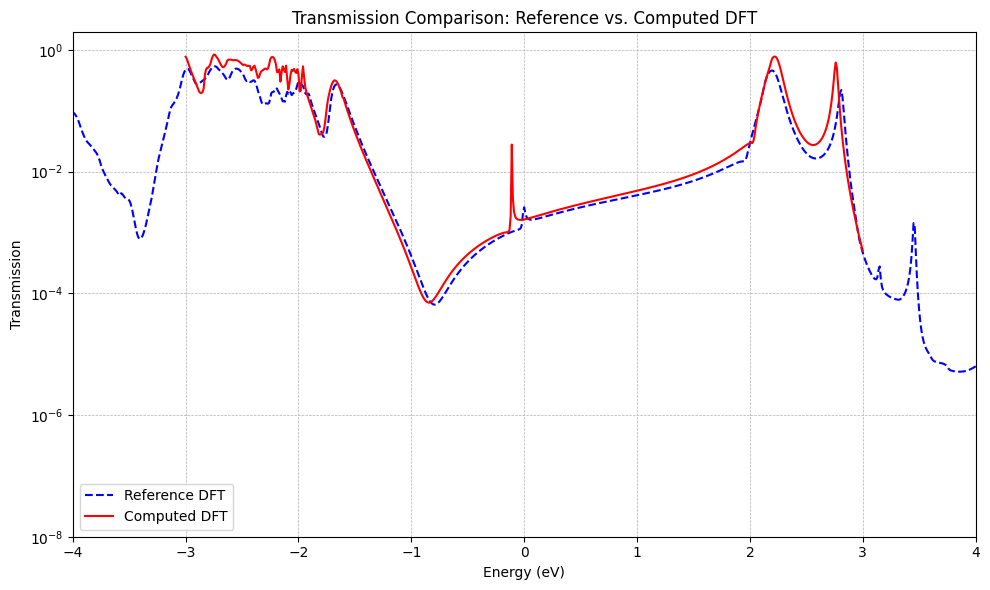

In [6]:
# Plot the reference and computed DFT transmission data
plt.figure(figsize=(10, 6))

# Plot the reference data
plt.plot(Eref, Tref_dft, label="Reference DFT", linestyle="--", color="blue")

# Plot the computed data
plt.plot(E, dft_transmission, label="Computed DFT", linestyle="-", color="red")

# Set plot title and axis labels
plt.title("Transmission Comparison: Reference vs. Computed DFT")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")

# Set the y-axis to logarithmic scale for better visualization
plt.yscale("log")
plt.xlim(-4, 4)
plt.ylim(bottom=1e-8)

# Add a grid, legend, and display
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

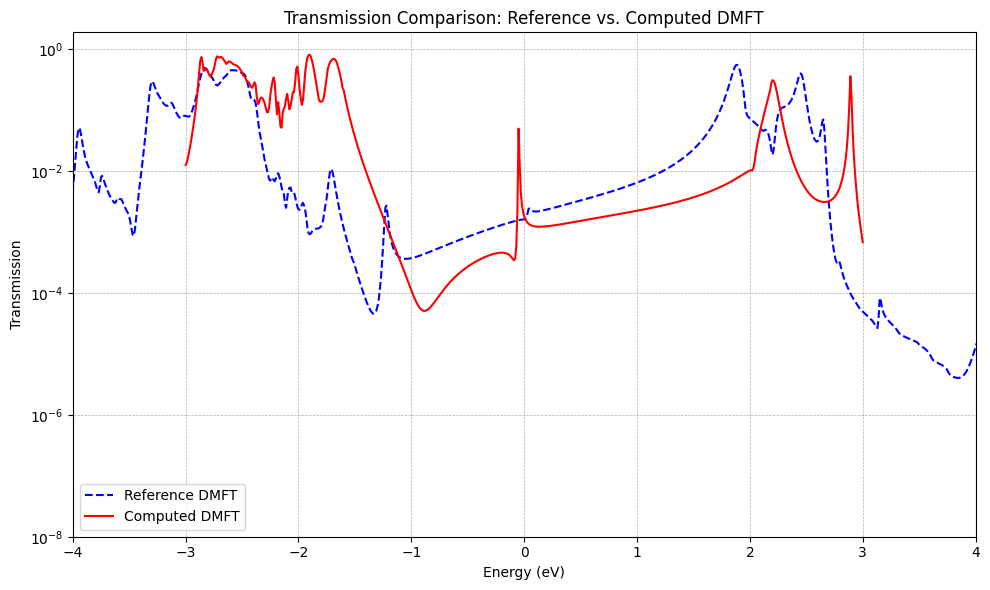

In [7]:
# Plot the reference and computed DFT transmission data
plt.figure(figsize=(10, 6))

# Plot the reference data
plt.plot(E2ref, Tref_dmft, label="Reference DMFT", linestyle="--", color="blue")

# Plot the computed data
plt.plot(E2, dmft_transmission, label="Computed DMFT", linestyle="-", color="red")

# Set plot title and axis labels
plt.title("Transmission Comparison: Reference vs. Computed DMFT")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")

# Set the y-axis to logarithmic scale for better visualization
plt.yscale("log")
plt.xlim(-4, 4)
plt.ylim(bottom=1e-8)

# Add a grid, legend, and display
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

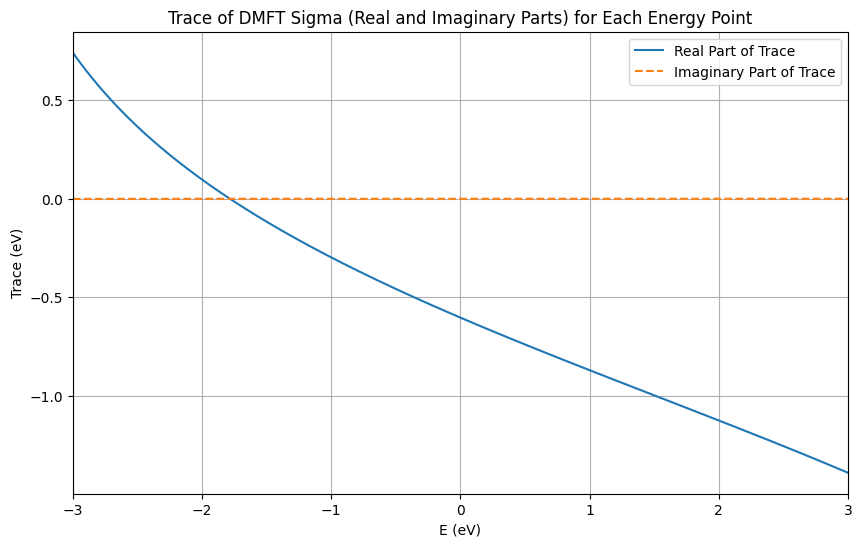

In [8]:
# Load dmft_sigma and energies from the data dictionary
dmft_sigma = data['dmft_sigma']
energies = data['energies']

# Compute the trace for each 9x9 matrix across the 601 energies
traces = np.array([np.trace(dmft_sigma[i]) for i in range(dmft_sigma.shape[0])])

# Separate the real and imaginary parts of the trace
traces_real = traces.real
traces_imag = traces.imag

# Plot the real and imaginary parts of the trace as a function of energy
plt.figure(figsize=(10, 6))
plt.plot(energies, traces_real, label='Real Part of Trace', linestyle='-')  # Solid line for real part
plt.plot(energies, traces_imag, label='Imaginary Part of Trace', linestyle='--')  # Dashed line for imaginary part

plt.xlim(-3,3)

# Customize the plot
plt.title("Trace of DMFT Sigma (Real and Imaginary Parts) for Each Energy Point")
plt.xlabel("E (eV)")
plt.ylabel("Trace (eV)")
plt.legend()
plt.grid(True)
plt.show()


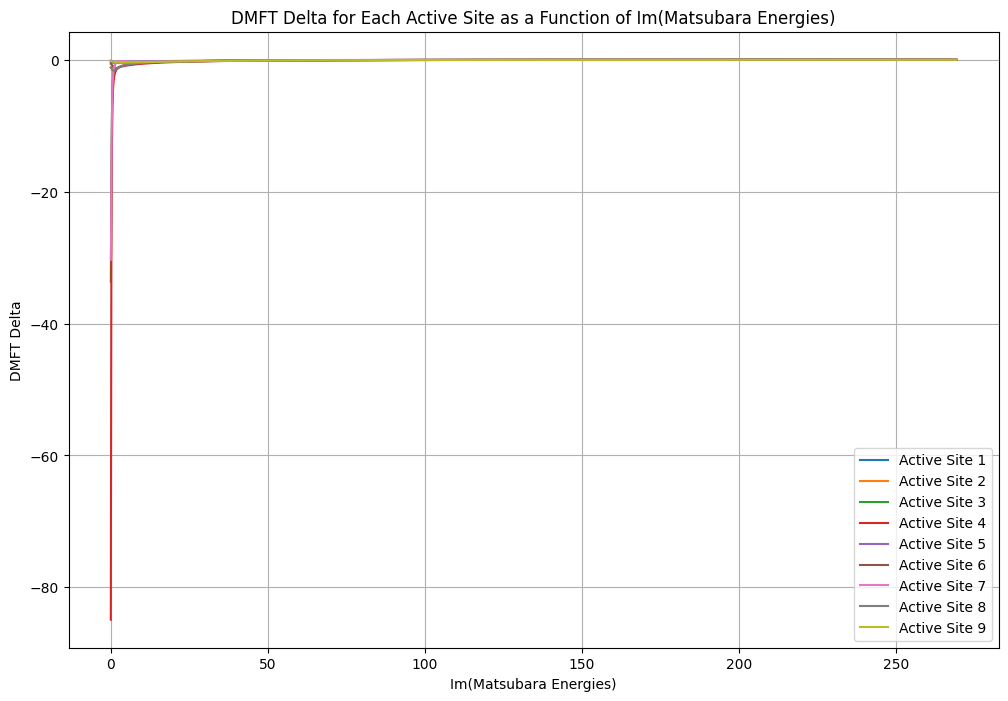

In [9]:
# Load dmft_delta and matsubara_energies from the data dictionary
dmft_delta = data['dmft_delta']
matsubara_energies = data['matsubara_energies']

# Plot dmft_delta for each active site as a function of matsubara_energies
plt.figure(figsize=(12, 8))
for i in range(dmft_delta.shape[0]):  # Loop over the 9 active sites
    plt.plot(matsubara_energies.imag, dmft_delta[i], label=f'Active Site {i + 1}')

# Customize the plot
plt.title("DMFT Delta for Each Active Site as a Function of Im(Matsubara Energies)")
plt.xlabel("Im(Matsubara Energies)")
plt.ylabel("DMFT Delta")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
sigma = np.load("output/compute_run/model_parallel_nbath8/dmft_sigma.npy")
gfloc = np.load("output/compute_run/model_parallel_nbath8/dmft_gfloc.npy")

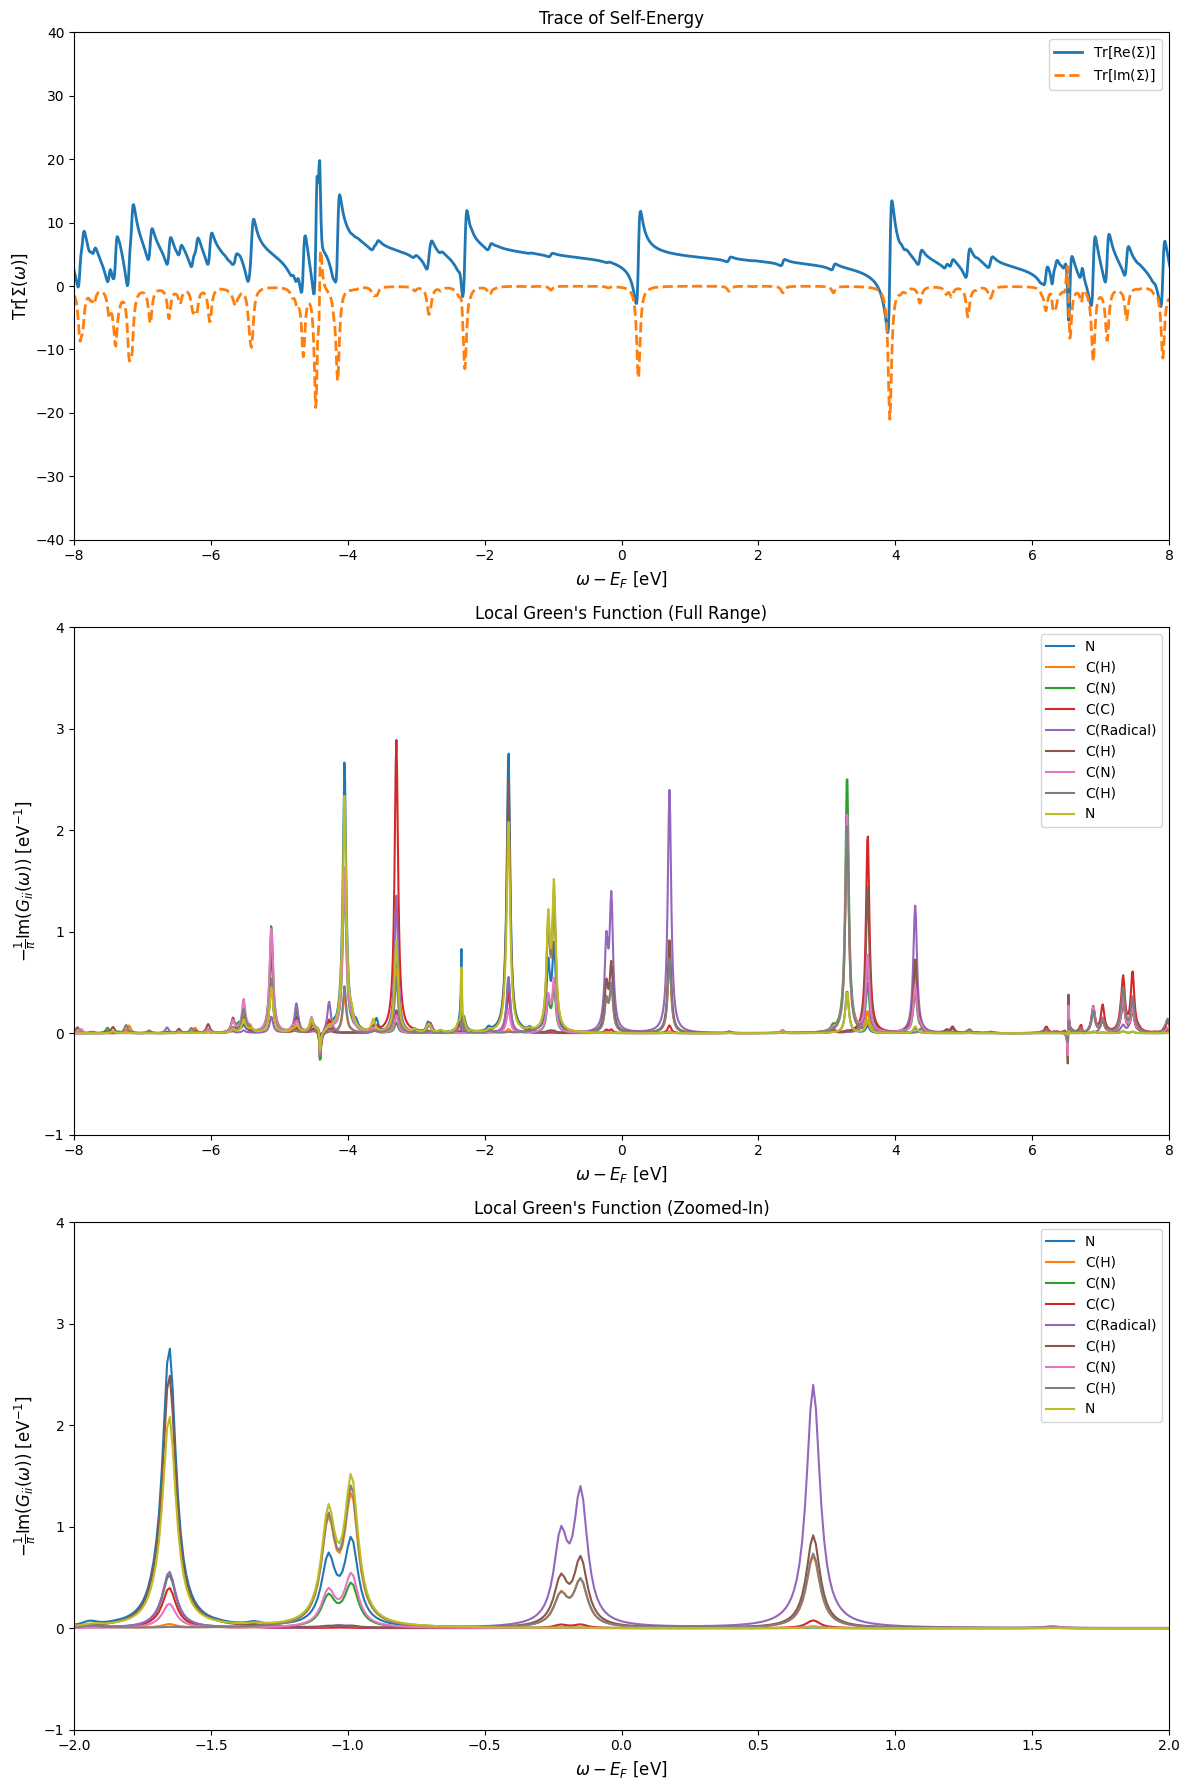

In [24]:
import numpy as np
import matplotlib.pyplot as plt

traces = np.array([np.trace(sigma[i]) for i in range(sigma.shape[0])])
energies = np.arange(-10, 10, 0.01)

traces_real = traces.real
traces_imag = traces.imag

labels = ["N", "C(H)", "C(N)", "C(C)", "C(Radical)", "C(H)", "C(N)", "C(H)", "N"]

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(12, 18))

ax0.plot(energies, traces_real, label=r'Tr[Re($\Sigma$)]', linestyle='-', linewidth=2)
ax0.plot(energies, traces_imag, label=r'Tr[Im($\Sigma$)]', linestyle='--', linewidth=2)
ax0.set_xlabel(r"$\omega - E_F$ [eV]", fontsize=12)
ax0.set_ylabel(r"Tr[$\Sigma(\omega)$]", fontsize=12)
ax0.set_xlim(-8, 8)
ax0.set_ylim(-40, 40)
ax0.legend()
ax0.set_title("Trace of Self-Energy")

for i, label in enumerate(labels):
    ax1.plot(np.real(energies), -(1/np.pi) * np.imag(gfloc[i]), label=label, linewidth=1.5)
ax1.set_xlabel(r'$\omega - E_F$ [eV]', fontsize=12)
ax1.set_ylabel(r'$-\frac{1}{\pi} \operatorname{Im}(G_{ii}(\omega))$ [eV$^{-1}$]', fontsize=12)
ax1.set_xlim(-8, 8)
ax1.set_ylim(-1, 4)
ax1.legend()
ax1.set_title("Local Green's Function (Full Range)")

for i, label in enumerate(labels):
    ax2.plot(np.real(energies), -(1/np.pi) * np.imag(gfloc[i]), label=label, linewidth=1.5)
ax2.set_xlabel(r'$\omega - E_F$ [eV]', fontsize=12)
ax2.set_ylabel(r'$-\frac{1}{\pi} \operatorname{Im}(G_{ii}(\omega))$ [eV$^{-1}$]', fontsize=12)
ax2.set_xlim(-2, 2)
ax2.set_ylim(-1, 4)
ax2.legend()
ax2.set_title("Local Green's Function (Zoomed-In)")

plt.tight_layout()
plt.show()
